In [125]:
import torch 
import matplotlib.pyplot
import pandas as pd
import seaborn as sns

In [126]:
from sklearn.datasets import make_circles
n_samples = 1000

X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [127]:
print(f"Isi X adalah:\n {X[:5]}")
print(f"Isi y adalah:\n {y[:5]}")

Isi X adalah:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Isi y adalah:
 [1 1 1 1 0]


In [128]:
df = pd.DataFrame({"X1": X[:,0],"X2": X[:,1],"label":y})
df.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [129]:
df["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='X1', ylabel='X2'>

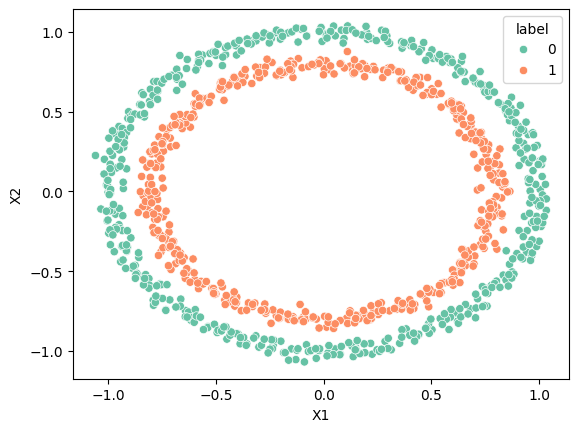

In [130]:
sns.scatterplot(x=df["X1"],y=df["X2"],data=df,hue="label",palette="Set2")

In [142]:
X = torch.tensor(df.drop("label", axis=1).values,dtype=torch.float)
y = torch.tensor(df["label"].values,dtype=torch.float)

In [144]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [145]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

len(X_train)

800

In [146]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [148]:
from torch import nn

class CircleModelV0(nn.Module):
    def __init__(self) :
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self,X):
       return self.layer_2(self.layer_1(X))

In [149]:
circle_model_v0 = CircleModelV0().to(device)
circle_model_v0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [153]:
class CircleModelV1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1),
        )

    def forward(self,X):
        return self.two_linear_layers(X)

In [154]:
circle_model_v1 = CircleModelV1()
circle_model_v1

CircleModelV1(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [155]:
circle_model_v1.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[-0.4049,  0.1048],
                      [ 0.0108,  0.4846],
                      [ 0.5897, -0.2079],
                      [ 0.2359,  0.4703],
                      [-0.4979, -0.1311]])),
             ('two_linear_layers.0.bias',
              tensor([-0.0605,  0.4588,  0.1840, -0.1688,  0.4666])),
             ('two_linear_layers.1.weight',
              tensor([[-0.3609, -0.1840, -0.4223, -0.3122,  0.0102]])),
             ('two_linear_layers.1.bias', tensor([0.0949]))])